In [64]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('conhecimento_filtrado.csv')
print(len(df))

82053


In [17]:
df1 = df[df.verifica==1].copy()
print(len(df1))
df3 = df[df.verifica==3].copy()
print(len(df3))

12893
58764


In [4]:
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [19]:
def gera_sumario(df):
    dados = []
    for c in cols:
        dados.append([
            c, # coluna
            df[c].mean(),   # media
            df[c].median(), # mediana
            df[c].std()**2, # variancia
            df[c].std(),    # std
        ])
    sumario = pd.DataFrame(dados, columns=['coluna', 'media', 'mediana', 'variancia', 'std'])
    sumario = sumario.sort_values('std', ascending=False).copy().reset_index(drop=True)
    return sumario

In [20]:
sumario1 = gera_sumario(df1)

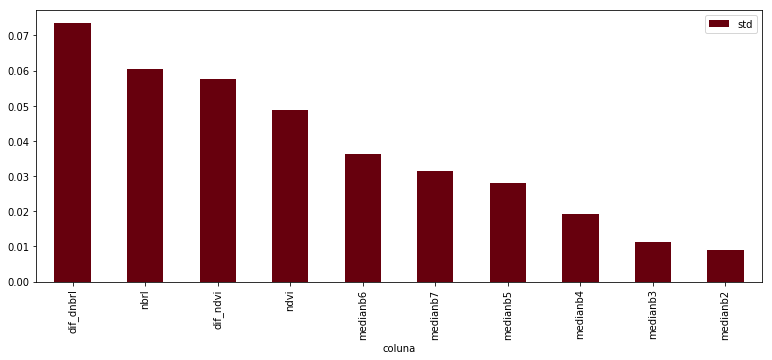

In [21]:
sumario1.plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))

In [22]:
melhor = sumario1.coluna.loc[0]
pior = sumario1.coluna.loc[len(sumario1)-1]

dado discrepante melhor coluna dif_dnbrl


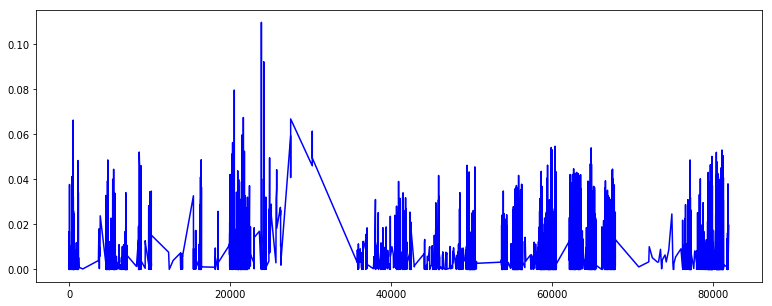

In [23]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
print('dado discrepante melhor coluna', melhor)

dado discrepante pior coluna medianb2


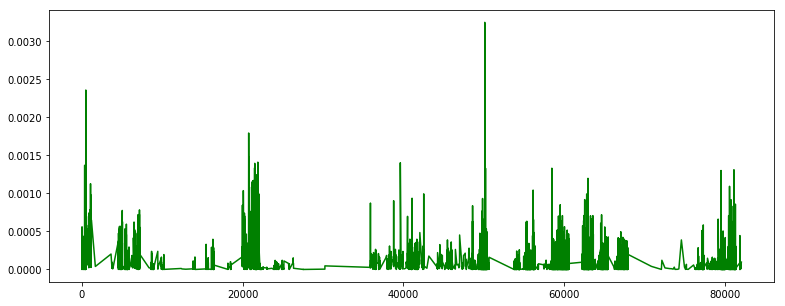

In [24]:
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))
print('dado discrepante pior coluna', pior)

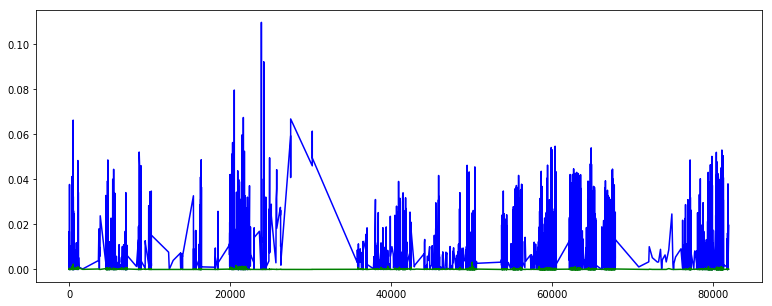

In [25]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))


In [26]:
sumario3 = gera_sumario(df3)

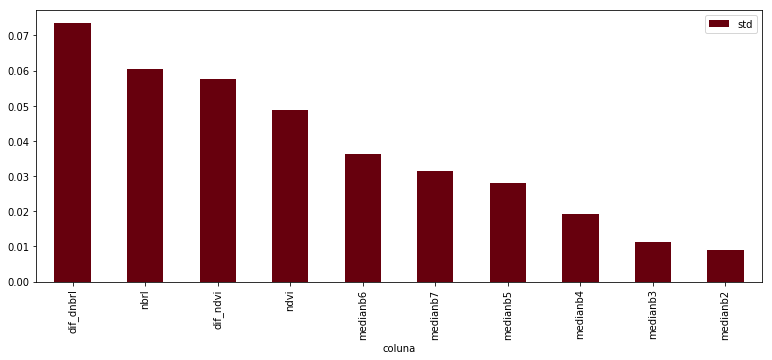

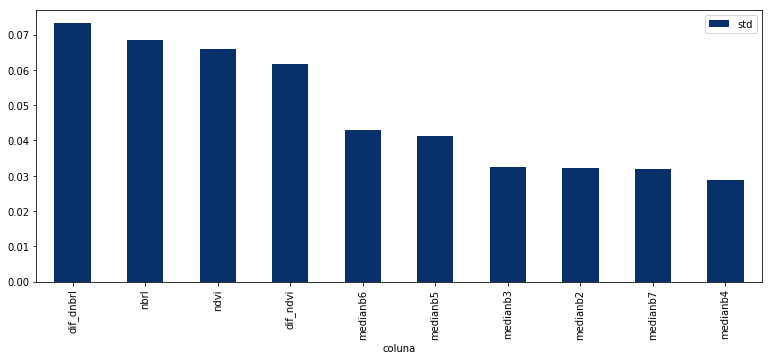

In [27]:
(sumario1).plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))
(sumario3).plot(x="coluna", y=['std'], kind="bar", colormap='Blues_r', figsize=(13,5))

(array([  26.,  275., 1264., 2834., 3309., 2321., 1611.,  903.,  311.,
          39.]),
 array([-0.15038837, -0.11178522, -0.07318207, -0.03457892,  0.00402423,
         0.04262738,  0.08123053,  0.11983368,  0.15843683,  0.19703998,
         0.23564313]),
 <a list of 10 Patch objects>)

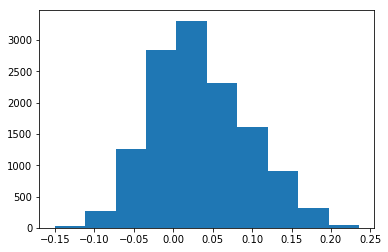

In [38]:
# hist = np.histogram(df1.dif_dnbrl)
plt.hist(df1.nbrl)

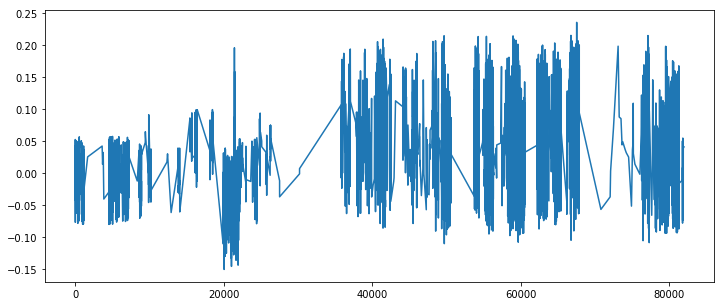

In [41]:
a=df1.nbrl.plot(figsize=(12,5))

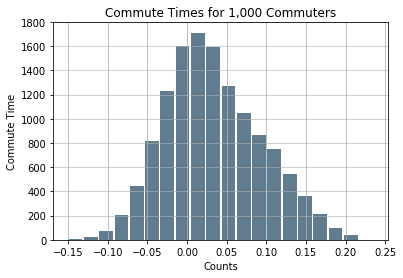

In [47]:
df1.nbrl.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)
plt.plot(df1.nbrl.mean())

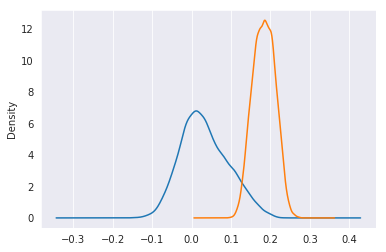

In [73]:
x = df1[['nbrl','medianb5']]
fig, ax = plt.subplots()
x.plot.kde(ax=ax, legend=False)
# ax.plot(x,x.nbrl.mean(), label='Mean', linestyle='--')

# (df1[['nbrl','medianb4']]).plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
# (df1[['nbrl','medianb5']]).plot.hist(density=True, ax=ax)
ax.grid(axis='y')


In [74]:
x1 = df1[:10000]
x3 = df3[:10000]

AttributeError: 'tuple' object has no attribute 'plot'

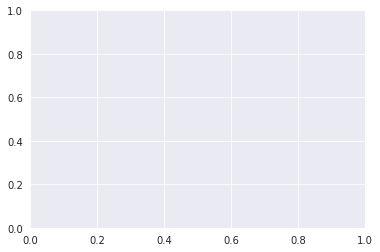

In [75]:
fig, ax = plt.subplots()
(x1,x3).plot.kde(ax=ax, legend=False)
# ax.plot(x,x.nbrl.mean(), label='Mean', linestyle='--')

# (df1[['nbrl','medianb4']]).plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
# (df1[['nbrl','medianb5']]).plot.hist(density=True, ax=ax)
ax.grid(axis='y')
